In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from importlib import reload
from dm_control import suite

from environments.observation_domains import estimate_domains
import environments
from environments import point
from environments import reacher_explore
from environments import hallway
from environments import ball_in_cup_explore
from environments import manipulator_explore

import utils

In [7]:
def render(physics, camera_id=None, height=480, width=480, **kwargs):
    args = {'height': height, 'width': width, **kwargs}
    if camera_id is not None:
        args['camera_id'] = camera_id
    img = physics.render(**args)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

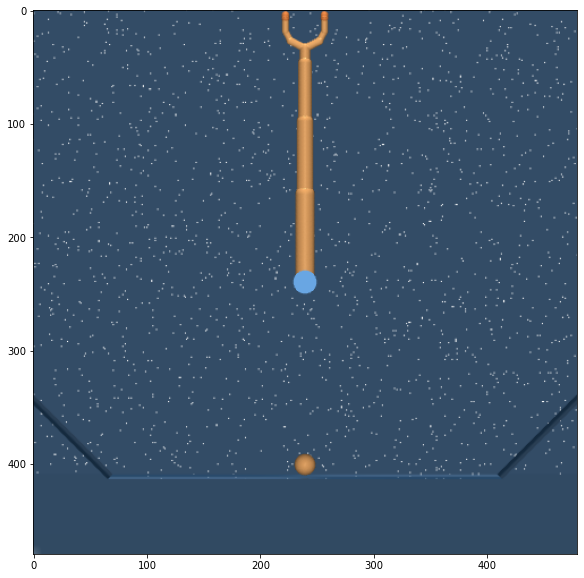

In [27]:
reload(manipulator_explore)
env = suite.load('manipulator_explore', 'reach_shaped_lift_ball_fixed')
timestep = env.reset()
flat_obs = utils.flatten_observation(timestep.observation)
# print(env.physics.named.data.qpos[env.task._object_joints])
# print(select_observations(env.observation_spec(), {'object_pos'}, flat_obs))
render(env.physics, camera_id="fixed")

[0.32854891 0.1001191 ]


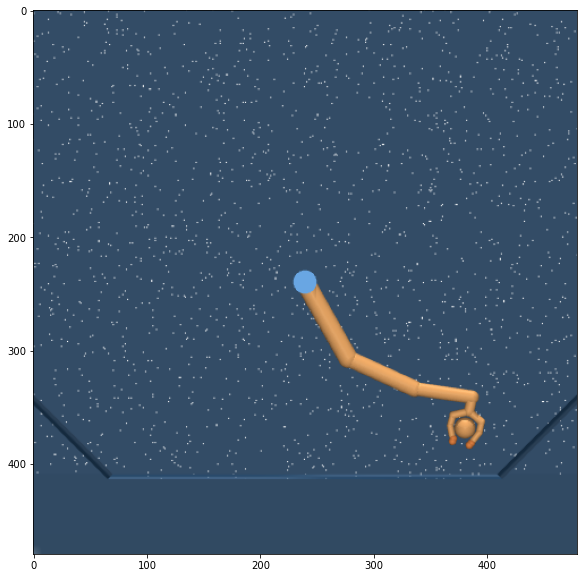

In [298]:
# env.reset()
env.physics.named.data.qpos[env.task._object_joints[:2]] = env.physics.named.data.site_xpos['grasp', 'x'], env.physics.named.data.site_xpos['grasp', 'z']
env.physics.after_reset()
print(env.physics.named.data.qpos[env.task._object_joints[:2]])
render(env.physics, camera_id='fixed')

0.0

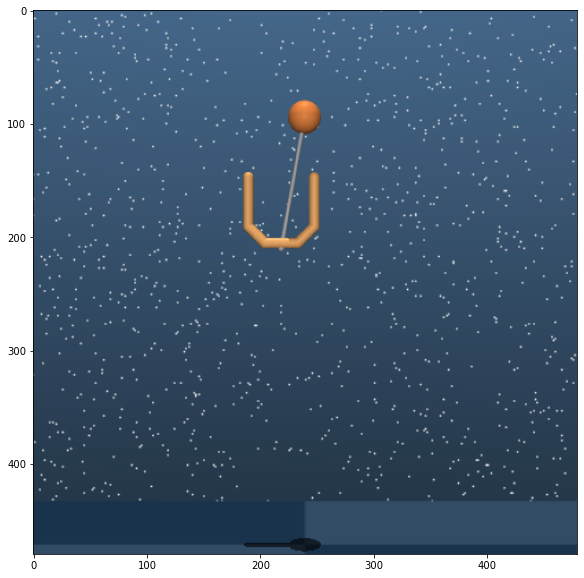

In [330]:
timestep = env.step(-np.ones(env.action_spec().shape))
render(env.physics, camera_id='cam1')
timestep.reward

In [280]:
print(env.physics.named.data.qpos[env.task._object_joints[:2]])

[-0.35336783  0.29021545]


In [255]:
env.physics.data.qpos[:] = qpos

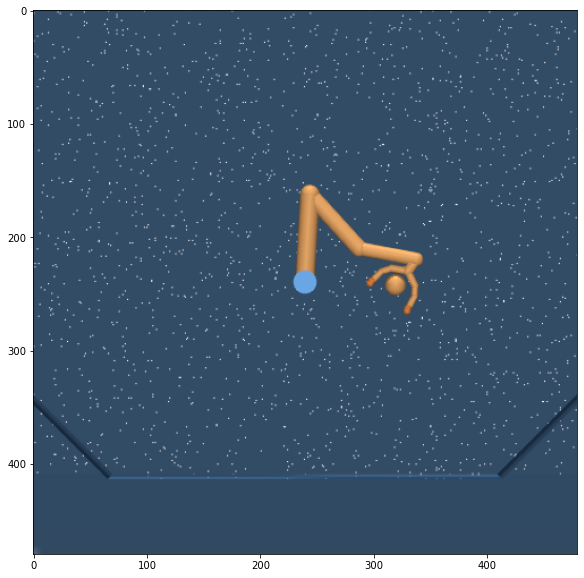

In [151]:
render(env.physics, camera_id='fixed')

In [92]:
timestep = env.step(np.zeros(env.action_spec().shape))
flat_obs = utils.flatten_observation(timestep.observation)
select_observations(env.observation_spec(), {'object_pos'}, flat_obs)[[0, 1]]

DeviceArray([-0.2522675,  0.7374886], dtype=float32)

In [12]:
def select_observations(ospec, elements, flat_obs):
    dims = []
    start_dim = 0
    for name, component in ospec.items():
        end_dim = start_dim + np.prod(component.shape)
        if name in elements:
            dims += list(range(start_dim, end_dim))
        start_dim = end_dim
    return flat_obs[..., dims]

flat_obs = utils.flatten_observation(timestep.observation)
select_observations(env.observation_spec(), {'arm_pos', 'object_pos'}, flat_obs)

DeviceArray([-0.11763503,  0.9930569 , -0.21505775,  0.97660136,
              0.12953906,  0.99157435, -0.09866496,  0.9951207 ,
              0.44089523,  0.89755857, -0.26260105,  0.9649045 ,
              0.44089523,  0.89755857,  0.07570235,  0.99713045,
              0.00334438,  0.04861823, -0.42195395,  0.9066173 ],            dtype=float32)

In [85]:
'object_pos' in env.observation_spec()

True

In [73]:
estimate_domains('ball_in_cup_explore', 'catch')

/home/will/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(OrderedDict([('position',
               DeviceArray([-0.24999996, -0.2806425 , -0.19860573, -0.19612767], dtype=float32)),
              ('velocity',
               DeviceArray([-1.3179755, -1.4795201, -1.2515078, -2.8917093], dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([0.265898  , 0.19719523, 0.47615352, 0.27073643], dtype=float32)),
              ('velocity',
               DeviceArray([1.4794071, 1.2212688, 1.4865134, 0.9554692], dtype=float32))]))

In [6]:
physics = env.physics

In [14]:
physics.named.model.geom_size

FieldIndexer(geom_size):
               x         y         z         
0     ground [ 4         0.1       0.1     ]
1     wall_x [ 0.02      0.1       0.02    ]
2     wall_y [ 3         0.02      0.02    ]
3 wall_neg_x [ 0.1       0.02      0.02    ]
4 wall_neg_y [ 3         0.02      0.02    ]
5 distractor [ 0.1       0         0       ]
6     target [ 0.05      0         0       ]
7  pointmass [ 0.01      0         0       ]

In [8]:
physics.named.model.jnt_range

FieldIndexer(jnt_range):
0 root_x [-4         4       ]
1 root_y [-0.1       0.1     ]

In [9]:
with physics.reset_context():
    physics.named.model.geom_pos['wall_x'][0] = -1
    physics.named.model.geom_pos['wall_neg_x'][0] = 1

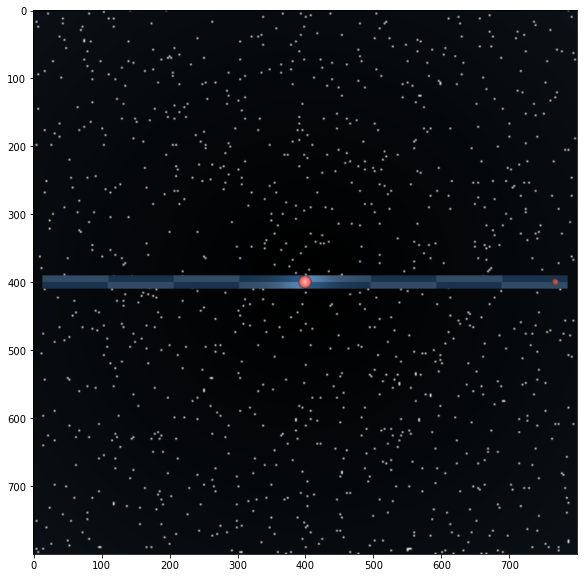

In [10]:
render(physics, camera='fixed')